In [1]:
import pandas as pd
import numpy as np

In [2]:
dates = pd.date_range('20130101', periods=6)

In [3]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.447584,0.852342,0.120593,-0.593424
2013-01-02,0.014061,-0.519049,-0.548057,0.193632
2013-01-03,-0.652425,-1.974621,-0.869977,0.024535
2013-01-04,1.293853,1.297966,-0.500199,-1.225930
2013-01-05,-0.579706,-0.648084,-0.476599,2.121172
2013-01-06,-0.842387,0.983483,0.379034,0.505550


### 统计

In [4]:
df.mean()

A   -0.369031
B   -0.001327
C   -0.315867
D    0.170922
dtype: float64

In [5]:
df.mean(1)#水平方向上

2013-01-01   -0.267018
2013-01-02   -0.214853
2013-01-03   -0.868122
2013-01-04    0.216423
2013-01-05    0.104196
2013-01-06    0.256420
Freq: D, dtype: float64

In [6]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [7]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.652425,-2.974621,-1.869977,-0.975465
2013-01-04,-1.706147,-1.702034,-3.500199,-4.225930
2013-01-05,-5.579706,-5.648084,-5.476599,-2.878828
2013-01-06,NaN,NaN,NaN,NaN


### 数据应用函数

In [8]:
df.apply(np.cumsum) #列方向上

,A,B,C,D
2013-01-01,-1.447584,0.852342,0.120593,-0.593424
2013-01-02,-1.433523,0.333293,-0.427464,-0.399792
2013-01-03,-2.085948,-1.641329,-1.297441,-0.375257
2013-01-04,-0.792095,-0.343362,-1.797640,-1.601187
2013-01-05,-1.371801,-0.991447,-2.274239,0.519985
2013-01-06,-2.214187,-0.007964,-1.895205,1.025535


In [9]:
df.apply(lambda x: x.max() - x.min())

A    2.741437
B    3.272587
C    1.249011
D    3.347102
dtype: float64

In [10]:
df.apply(lambda x: x.max() - x.min(), axis=1) #行方向上

2013-01-01    2.299926
2013-01-02    0.741690
2013-01-03    1.999156
2013-01-04    2.523896
2013-01-05    2.769256
2013-01-06    1.825870
Freq: D, dtype: float64

### 计数统计

In [11]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    3
2    1
3    1
4    5
5    6
6    4
7    6
8    3
9    0
dtype: int32

In [12]:
s.value_counts()

6    3
3    2
1    2
5    1
4    1
0    1
dtype: int64

### 字符串处理

In [13]:
s = pd.Series(['A', 'Aaba', 'Baca', np.nan, 'cat'])
s.str.lower()#全部转为小写

0       a
1    aaba
2    baca
3     NaN
4     cat
dtype: object

### 合并操作

主要有：
- concat
- append
- merge

### 分组

In [14]:
df = pd.DataFrame({
    'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'], 
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.395075,-1.844267
1,bar,one,-0.896412,-0.262245
2,foo,two,1.185699,0.053238
3,bar,three,0.199448,-0.601968
4,foo,two,1.279930,0.634289
5,bar,two,0.224917,0.015658
6,foo,one,-0.748312,-1.698321
7,foo,three,-1.589886,0.304110


In [15]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.472048,-0.848555
foo,1.522504,-2.550951


In [16]:
type(df.groupby('A'))

pandas.core.groupby.DataFrameGroupBy

In [17]:
df.groupby(['A','B']).sum() #多索引分组

C         D
A   B                        
bar one   -0.896412 -0.262245
    three  0.199448 -0.601968
    two    0.224917  0.015658
foo one    0.646763 -3.542588
    three -1.589886  0.304110
    two    2.465628  0.687527

### 画图

In [18]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))
ts = ts.cumsum()

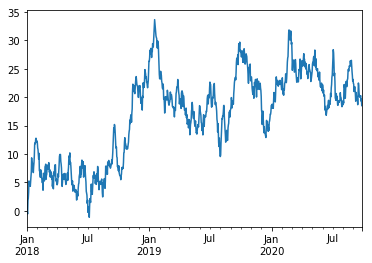

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
ts.plot()

In [20]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df[:4]

,A,B,C,D
2018-01-01,0.758769,-0.340666,1.398283,-0.020281
2018-01-02,0.590606,-2.214095,0.538184,0.415387
2018-01-03,-0.007841,-2.795681,0.834846,0.860402
2018-01-04,-1.000464,-3.858726,1.955132,-0.151562


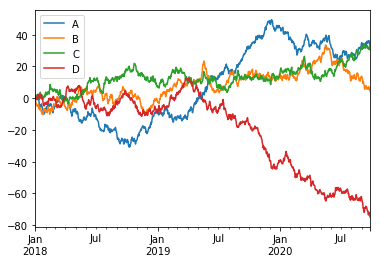

In [21]:
df.plot()